In [408]:
import numpy as np
ids=np.load('ids.npy')
ids=list(ids)
print(ids)
print(len(ids))

[101031, 8526, 43127, 191394, 298792, 121086, 149475, 102605, 163605, 101855, 135720, 202472, 78948, 205516, 130325, 61352, 12573, 148600, 288522, 121039, 142636, 248729, 98173, 110229, 251315, 294900, 69630, 246410, 205724, 241323, 239570, 74090, 206834, 248228, 277825, 177638, 178460, 195306, 57873, 239078, 142185, 240902, 77409, 114516, 158823, 257739, 162041, 19492, 105759, 300664, 233603, 213129, 28202, 154881, 56113, 218900, 77103, 166599, 97556, 73616, 236198, 166840, 77532, 3669, 191063, 5040, 57826, 74718, 304774, 48059, 21290, 268421, 236305, 229322, 280199, 305084, 107778, 230929, 272095, 141814, 297494, 262306, 7149, 222224, 66291, 104205, 252405, 231398, 45372, 292658, 144859, 201391, 1212, 270096, 287366, 208108, 71574, 260196, 210798, 162229, 292402, 170376, 193023, 6021, 135462, 122707, 298246, 171671, 263538, 76182, 141419, 256928, 293835, 13331, 217190, 19693, 122601, 187403, 35388, 189706, 56506, 130137, 51870, 41849, 81127, 88318, 277129, 254901, 100903, 100569, 195

In [11]:
import requests
import json

SERVER_URL = "http://34.71.138.79:9090"
TEAM_TOKEN = "5KogzTO5QjSdXupe"


def sybil(ids: list[int], home_or_defense: str, binary_or_affine: str):
    if home_or_defense not in ["home", "defense"] or binary_or_affine not in [
        "binary",
        "affine",
    ]:
        raise Exception("Invalid endpoint")
    SERVER_URL = "http://34.71.138.79:9090"
    TEAM_TOKEN = "5KogzTO5QjSdXupe"

    endpoint = f"/sybil/{binary_or_affine}/{home_or_defense}"
    url = SERVER_URL + endpoint
    ids = ",".join(map(str, ids))
    response = requests.get(url, params={"ids": ids}, headers={"token": TEAM_TOKEN})
    if response.status_code == 200:
        representations = response.json()["representations"]
        ids = response.json()["ids"]
        return representations
    else:
        raise Exception(
            f"Sybil failed. Code: {response.status_code}, content: {response.json()}"
        )
#print(len(sybil([1],'home','affine')[0]))

In [482]:
def sybil_reset(binary_or_affine: str, home_or_defense: str):
    if binary_or_affine not in ["binary", "affine"]:
        raise Exception("Invalid endpoint")

    if home_or_defense not in ["home", "defense"]:
        raise Exception("Invalid endpoint")
    SERVER_URL = "http://34.71.138.79:9090"
    TEAM_TOKEN = "5KogzTO5QjSdXupe"

    endpoint = f"/sybil/{binary_or_affine}/reset/{home_or_defense}"
    url = SERVER_URL + endpoint
    response = requests.post(url, headers={"token": TEAM_TOKEN})
    if response.status_code == 200:
        print("Request ok")
        print(response.json())
    else:
        raise Exception(
            f"Sybil reset failed. Code: {response.status_code}, content: {response.json()}"
        )
sybil_reset('affine','defense')

Request ok
{'msg': 'Successful sybil affine reset defense'}


In [483]:
# homing=sybil(ids[iter*100:(1+iter)*100],'home','affine')
# for x in homing:
#   home.append(x)
# iter+=1
# print(len(home))
home_lander=[]
to_fix=[]
for x in range(10):
  homing=sybil(ids[x*100:(1+x)*100],'defense','affine')
  print(x*100,(1+x)*100)
  print(len(home_lander))
  for s in homing:
    home_lander.append(s)

for x in range(190,200):
  homing=sybil(ids[x*100:(1+x)*100],'defense','affine')
  print(x*100,(1+x)*100)
  print(len(to_fix))
  for s in homing:
    to_fix.append(s)

0 100
0
100 200
100
200 300
200
300 400
300
400 500
400
500 600
500
600 700
600
700 800
700
800 900
800
900 1000
900
19000 19100
0
19100 19200
100
19200 19300
200
19300 19400
300
19400 19500
400
19500 19600
500
19600 19700
600
19700 19800
700
19800 19900
800
19900 20000
900


In [484]:
# print(np.array(home).shape)
np.save('home_lander20.npy',np.array(home_lander))
np.save('to_fix20.npy',np.array(to_fix))

In [364]:
print(np.array(home_lander).shape)

(1000, 384)


In [174]:
number=0
np.isclose
for x in home:
  for y in home:
    if x==y:number+=1
print(number)

3800


In [ ]:
home=np.load('home.npy')
defense=np.load('defense1.npy')

print(home.shape)
print(defense.shape)

In [299]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Definicja klasy modelu
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Parametry sieci
input_size = 770  # Rozmiar wektora wejściowego
hidden_size = 384*4+4  # Rozmiar warstw ukrytych
output_size = (384+1)**2  # Rozmiar wektora wyjściowego

# Tworzenie instancji modelu
model = SimpleNN(input_size, hidden_size, output_size)

# Definicja optymalizatora i funkcji straty
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CosineSimilarity(dim=0)

# Przykładowe dane (zastąp swoimi danymi treningowymi)
# Przyjmijmy, że mamy 100 par wektorów
x_train = torch.Tensor(np.copy(defense[0:2000]))
y_train = torch.Tensor(np.copy(home[0:2000]))


dataset = TensorDataset(x_train, y_train)
batch_size = 10  # Możesz dostosować rozmiar batcha do swoich potrzeb
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
# Pętla treningowa
epochs = 100
for epoch in range(epochs):
    for i in range(len(x_train)):
        model.train()
        total_loss = 0
        for x_batch, y_batch in data_loader:
        # Zerowanie gradientów
          optimizer.zero_grad()
          # Przeprowadzenie predykcji
          print(np.concatenate((np.array(x_train[i]),[1],np.array(y_train[i]),[1])).shape)
          outputs = model( torch.Tensor(np.concatenate((x_train[i],[1],y_train[i],[1]))))
          outputs2=(outputs.view(1,-1)).reshape(384+1,384+1)
          outputs2[-1,:]*=0
          outputs2[-1,-1]=1
          # Obliczenie straty
          transformed = torch.matmul(outputs2, torch.concatenate([x_train[i], torch.ones(1)]))
          # print(transformed)
          loss = criterion( transformed, torch.concatenate([y_train[i],torch.ones(1)]))
          # Propagacja wsteczna
          loss.backward()
          # Aktualizacja wag
          optimizer.step()

    # Wyświetlenie postępu co pewien czas

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [335]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class SimpleNN(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

dim_size = 384
input_size = (dim_size+1)*2
hidden_size = (dim_size+1)*4
output_size = (dim_size+1)**2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


model = SimpleNN(input_size, hidden_size, output_size).to(device)


optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CosineSimilarity(dim=0)


x_train = torch.Tensor(np.copy(defense[0:1000]))
y_train = torch.Tensor(np.copy(home[0:1000]))

x_train = x_train.to(device)
y_train = y_train.to(device)

wej=torch.concatenate([x_train, y_train])

dataset = TensorDataset(x_train, y_train)
batch_size = 10
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

epochs = 10
for epoch in range(epochs):
      model.train()
      total_loss = 0
      for x_batch, y_batch in data_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        # Augment x_batch and y_batch with ones to facilitate affine transformation
        x_augmented = torch.cat([x_batch, torch.ones(x_batch.shape[0], 1).to(device)], dim=1)
        y_augmented = torch.cat([y_batch, torch.ones(y_batch.shape[0], 1).to(device)], dim=1)

        outputs = model(torch.cat([x_augmented,  y_augmented], dim=1))

        # Reshape outputs to a batch of affine transformation matrices
        affine_matrices = outputs.view(-1, dim_size+1, dim_size+1)

        # Apply the affine transformation
        transformed = torch.bmm(affine_matrices, x_augmented.unsqueeze(-1)).squeeze(-1)

        # Ensure y_batch is the correct target for loss calculation
        loss = 1 - criterion(transformed[:, :-1], y_batch).mean()  # Ignore the augmented ones in transformed tensors

        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        # optimizer.zero_grad()
        # expanded_x_y_batch = torch.concatenate([x_batch,torch.ones(x_batch.shape[0],1),y_batch,torch.ones(y_batch.shape[0],1)],axis=1)
        # outputs = model(expanded_x_y_batch)
        # # outputs2=(outputs.view(1,-1)).reshape(len(x_batch),dim_size+1,dim_size+1)
        # # outputs2[-1,:]*=0
        # # outputs2[-1,-1]=1

        # # transformed = torch.matmul(outputs2, torch.concatenate([x_batch, torch.ones(x_batch.shape[0],1)],axis=1))


        # loss.backward()

        # optimizer.step()
        # total_loss += loss.item()



      print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')


Using device: cuda
Epoch [1/10], Loss: 0.06053954362869263
Epoch [2/10], Loss: 0.04179978370666504
Epoch [3/10], Loss: 0.02739131450653076
Epoch [4/10], Loss: 0.03778320550918579
Epoch [5/10], Loss: 0.024253666400909424
Epoch [6/10], Loss: 0.02200847864151001
Epoch [7/10], Loss: 0.019797801971435547
Epoch [8/10], Loss: 0.020288467407226562
Epoch [9/10], Loss: 0.019881606101989746
Epoch [10/10], Loss: 0.01542806625366211


In [336]:
import torch
import torch.nn.functional as F
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

# Assuming 'defense' and 'home' are numpy arrays with more than 2000 examples
# Training data has already been defined in your code
x_val = torch.Tensor(np.copy(defense[1000:3000]))  # Using examples beyond the first 2000 for validation
y_val = torch.Tensor(np.copy(home[1000:3000]))

# Transfer validation data to the device
x_val = x_val.to(device)
y_val = y_val.to(device)

# Assuming you have a batch_size defined
val_dataset = TensorDataset(x_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

def validate(model, data_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    with torch.no_grad():  # No gradients needed for validation
        for x_batch, y_batch in data_loader:
            # No need to transfer x_batch and y_batch to the device, already done above
            x_augmented = torch.cat([x_batch, torch.ones(x_batch.shape[0], 1, device=device)], dim=1)
            y_augmented = torch.cat([y_batch, torch.ones(y_batch.shape[0], 1, device=device)], dim=1)
            outputs = model(torch.cat([x_augmented, y_augmented ], dim=1))
            affine_matrices = outputs.view(-1, dim_size+1, dim_size+1)
            transformed = torch.bmm(affine_matrices, x_augmented.unsqueeze(-1)).squeeze(-1)
            loss = 1 - criterion(transformed[:, :-1], y_batch).mean()  # Assuming the loss calculation is correct
            total_loss += loss.item()

    avg_loss = total_loss / len(data_loader)
    print(f'Validation Loss: {avg_loss}')
    return avg_loss

# Example of how to call the validate function
validate(model, val_loader, criterion)

Validation Loss: 0.1686027929186821


0.1686027929186821

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

class SimpleNN(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

dim_size = 384
input_size = (dim_size+1)*2
hidden_size = (dim_size+1)*4
output_size = (dim_size+1)**2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
home=np.load('home.npy')
outputen=[]
for numer in range(2,21):
  defense = np.load('home_lander'+str(numer)+'.npy')

  model = SimpleNN(input_size, hidden_size, output_size).to(device)


  optimizer = optim.Adam(model.parameters(), lr=0.001)
  criterion = nn.MSELoss()


  x_train = torch.Tensor(np.copy(defense))
  y_train = torch.Tensor(np.copy(home[:1000]))

  x_train = x_train.to(device)
  y_train = y_train.to(device)

  wej=torch.concatenate([x_train, y_train])

  dataset = TensorDataset(x_train, y_train)
  batch_size = 10
  data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

  epochs = 20
  for epoch in range(epochs):
        model.train()
        min_loss=1000
        total_loss = 0
        for x_batch, y_batch in data_loader:
          x_batch = x_batch.to(device)
          y_batch = y_batch.to(device)
          optimizer.zero_grad()
          # Augment x_batch and y_batch with ones to facilitate affine transformation
          x_augmented = torch.cat([x_batch, torch.ones(x_batch.shape[0], 1).to(device)], dim=1)
          y_augmented = torch.cat([y_batch, torch.ones(y_batch.shape[0], 1).to(device)], dim=1)

          outputs = model(torch.cat([x_augmented,  y_augmented], dim=1))

          # Reshape outputs to a batch of affine transformation matrices
          affine_matrices = outputs.view(-1, dim_size+1, dim_size+1)

          # Apply the affine transformation
          transformed = torch.bmm(affine_matrices, x_augmented.unsqueeze(-1)).squeeze(-1)

          # Ensure y_batch is the correct target for loss calculation
          loss = criterion(transformed[:, :-1], y_batch).mean()  # Ignore the augmented ones in transformed tensors

          loss.backward()
          optimizer.step()
          total_loss += loss.item()
          # optimizer.zero_grad()
          # expanded_x_y_batch = torch.concatenate([x_batch,torch.ones(x_batch.shape[0],1),y_batch,torch.ones(y_batch.shape[0],1)],axis=1)
          # outputs = model(expanded_x_y_batch)
          # # outputs2=(outputs.view(1,-1)).reshape(len(x_batch),dim_size+1,dim_size+1)
          # # outputs2[-1,:]*=0
          # # outputs2[-1,-1]=1

          # # transformed = torch.matmul(outputs2, torch.concatenate([x_batch, torch.ones(x_batch.shape[0],1)],axis=1))


          # loss.backward()

          # optimizer.step()
          # total_loss += loss.item()



        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')
  fix_it = np.load('to_fix'+str(numer)+'.npy')
  # Assuming fix_it is a numpy array with the shape (1000, dim_size)
  # Convert fix_it to a PyTorch tensor and transfer it to the same device as your model
  fix_it_tensor = torch.Tensor(fix_it).to(device)  # Make sure fix_it is defined and loaded similarly to defense and home

  # Augment fix_it_tensor with ones to facilitate affine transformation
  # Since the transformation might require concatenation with ones, similar to how training data was prepared
  fix_it_augmented = torch.cat([fix_it_tensor, torch.ones(fix_it_tensor.shape[0], 1, device=device)], dim=1)

  # The model expects inputs concatenated with their pairs, as per the training phase
  # For the purpose of demonstration, let's concatenate fix_it_augmented with itself (or any relevant tensor you have)
  # Ideally, you should provide a meaningful tensor to concatenate based on your specific use case
  inputs = torch.cat([fix_it_augmented, fix_it_augmented], dim=1)  # This concatenation is just for demonstration

  # Pass the inputs through the model to get the outputs
  model.eval()  # Ensure the model is in evaluation mode
  with torch.no_grad():  # No need to compute gradients
      outputs = model(inputs)

  # Reshape the outputs to form the affine transformation matrices
  affine_matrices = outputs.view(-1, dim_size+1, dim_size+1)

  # Apply the affine transformation matrices to the augmented fix_it_tensor
  transformed_fix_it = torch.bmm(affine_matrices, fix_it_augmented.unsqueeze(-1)).squeeze(-1)

  # The transformed_fix_it tensor now holds the transformed data
  # If needed, you can convert it back to a NumPy array using .cpu().numpy() if it's on a GPU
  transformed_fix_it_np = transformed_fix_it.cpu().numpy() if device.type == 'cuda' else transformed_fix_it.numpy()
  outputen.append(np.copy(transformed_fix_it_np))
  for x in outputen:
    print(x.shape)
  print(len(outputen))
  # Note: The actual use of transformed_fix_it depends on your specific application requirements



Using device: cuda
Epoch [1/20], Loss: 0.4356149435043335
Epoch [2/20], Loss: 0.22606556117534637
Epoch [3/20], Loss: 0.37272700667381287
Epoch [4/20], Loss: 0.1946348249912262
Epoch [5/20], Loss: 0.15286046266555786
Epoch [6/20], Loss: 0.0834619551897049
Epoch [7/20], Loss: 0.13431626558303833
Epoch [8/20], Loss: 0.1901250034570694
Epoch [9/20], Loss: 0.09199273586273193
Epoch [10/20], Loss: 0.1353810727596283
Epoch [11/20], Loss: 0.07916045933961868
Epoch [12/20], Loss: 0.07576281577348709
Epoch [13/20], Loss: 0.10811451822519302
Epoch [14/20], Loss: 0.11543095856904984
Epoch [15/20], Loss: 0.836493194103241
Epoch [16/20], Loss: 0.2876683175563812
Epoch [17/20], Loss: 0.16278792917728424
Epoch [18/20], Loss: 0.10680557042360306
Epoch [19/20], Loss: 0.11147812753915787
Epoch [20/20], Loss: 0.09706403315067291
(1000, 385)
1
Epoch [1/20], Loss: 0.28858453035354614
Epoch [2/20], Loss: 0.20513281226158142
Epoch [3/20], Loss: 0.15582066774368286
Epoch [4/20], Loss: 0.10783352702856064
Epoc

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [13]:
print(len(outputen))
representations=[]
for x in home[0:3000]:
    representations.append(np.copy(x))
print(representations[-1].shape)
print(len(representations))
for x in outputen[2:]:
  for y in x:
    representations.append(np.copy(y[:-1]))
# print(representations[-1])
print(len(representations))
representations=np.array(representations)
print(representations.shape)

ids=np.load('ids.npy')

# print(outputs[0][0][:10],home[2000][:10])

# print(outputen[0][2000]-home[2000])

for x in outputen:
  print(x[0][1:10])

np.savez(
        "affine_submission.npz",
        ids=ids,
        representations=representations.astype(np.float32)
    )

19
(384,)
3000
20000
(20000, 384)
[-0.12467602 -2.0123627  -1.5047045  -1.9783117   8.872663   -0.9454471
 -0.44425327 -1.7424197   0.1971941 ]
[ 0.28989667  0.35648853 -1.0855331  -0.85352546  2.3304443  -0.7085726
 -0.43720853  0.20342968  0.70775497]
[-0.25860298 -0.1452383   0.04588005 -0.61342597  1.3992028  -0.8860105
 -1.2435508   0.04478844  0.30548573]
[ 0.49681556 -1.2960856  -1.1384951  -2.1036472   5.0267963  -1.6676579
 -1.461207   -1.1177555  -0.9047557 ]
[-0.34334645 -0.8560382  -1.1039798  -0.7497703   3.2365773  -0.86247206
 -0.45645404 -0.8747797   0.734648  ]
[-0.24631353 -1.7603159  -1.3188467  -1.8353413   7.61118    -0.6133658
 -0.30110592  0.37665218 -0.2190894 ]
[-0.26893327  0.16178164 -0.38627943 -0.47206372  0.0755315  -0.40895924
 -1.5043361  -0.7921419   0.27467158]
[-1.6104579 -1.4597273 -2.5775568 -2.2895539  5.052559  -1.304223
 -1.2021294 -2.0761194  2.2351933]
[ 0.04192922  1.2705808  -0.5190731  -0.6730051  -0.18249093 -0.66160274
 -1.3580757  -0.8929

In [9]:
def sybil_submit(binary_or_affine: str, path_to_npz_file: str):
    if binary_or_affine not in ["binary", "affine"]:
        raise Exception("Invalid endpoint")
    SERVER_URL = "http://34.71.138.79:9090"
    TEAM_TOKEN = "5KogzTO5QjSdXupe"
    endpoint = f"/sybil/{binary_or_affine}/submit"
    url = SERVER_URL + endpoint

    with open(path_to_npz_file, "rb") as f:
        response = requests.post(url, files={"file": f}, headers={"token": TEAM_TOKEN})

    if response.status_code == 200:
        print("OK")
        print(response.json())
    else:
        print(
            f"Request submit failed. Status code: {response.status_code}, content: {response.json()}"
        )

In [12]:
sybil_submit('affine','affine_submission.npz')

OK
{'score': 30.08002281188965}


In [14]:
import os
import numpy as np

if __name__ == "__main__":
    np.savez(
        "sybilattack/data/example_submission.npz",
        ids=np.random.permutation(20000),
        representations=np.random.randn(20000, 192),
    )

FileNotFoundError: [Errno 2] No such file or directory: 'sybilattack/data/example_submission.npz'

In [15]:
import torch
from taskdataset import TaskDataset


if __name__ == "__main__":
    dataset = torch.load("sybilattack/data/ExampleSybilAttack.pt")

    print(dataset.ids, dataset.imgs, dataset.labels)

ModuleNotFoundError: No module named 'taskdataset'

In [12]:
from torch.utils.data import Dataset
from typing import Tuple
import torch


class TaskDataset(Dataset):
    def __init__(self, transform=None):

        self.ids = []
        self.imgs = []
        self.labels = []

        self.transform = transform

    def __getitem__(self, index) -> Tuple[int, torch.Tensor, int]:
        id_ = self.ids[index]
        img = self.imgs[index]
        if not self.transform is None:
            img = self.transform(img)
        label = self.labels[index]
        return id_, img, label

    def __len__(self):
        return len(self.ids)

In [39]:
import torch
from taskdataset import TaskDataset


if __name__ == "__main__":
    dataset = torch.load("SybilAttack.pt")

    print(dataset.ids, dataset.imgs, dataset.labels)

[101031, 8526, 43127, 191394, 298792, 121086, 149475, 102605, 163605, 101855, 135720, 202472, 78948, 205516, 130325, 61352, 12573, 148600, 288522, 121039, 142636, 248729, 98173, 110229, 251315, 294900, 69630, 246410, 205724, 241323, 239570, 74090, 206834, 248228, 277825, 177638, 178460, 195306, 57873, 239078, 142185, 240902, 77409, 114516, 158823, 257739, 162041, 19492, 105759, 300664, 233603, 213129, 28202, 154881, 56113, 218900, 77103, 166599, 97556, 73616, 236198, 166840, 77532, 3669, 191063, 5040, 57826, 74718, 304774, 48059, 21290, 268421, 236305, 229322, 280199, 305084, 107778, 230929, 272095, 141814, 297494, 262306, 7149, 222224, 66291, 104205, 252405, 231398, 45372, 292658, 144859, 201391, 1212, 270096, 287366, 208108, 71574, 260196, 210798, 162229, 292402, 170376, 193023, 6021, 135462, 122707, 298246, 171671, 263538, 76182, 141419, 256928, 293835, 13331, 217190, 19693, 122601, 187403, 35388, 189706, 56506, 130137, 51870, 41849, 81127, 88318, 277129, 254901, 100903, 100569, 195

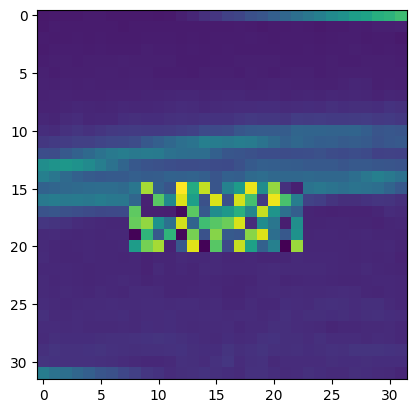

In [40]:
import cv2
import matplotlib.pyplot as plt



In [49]:
print(len(dataset.imgs))

20000


In [110]:
import numpy as np
import matplotlib.pyplot as plt
size=4



In [111]:
matrix = np.random.random([size,size+1])
aff_matrix=np.zeros([size+1,size+1])
aff_matrix[:-1,:]=matrix
aff_matrix[-1,-1]=1
print(aff_matrix)

[[0.24413876 0.79937208 0.54458739 0.28665082 0.39926609]
 [0.25297135 0.3909951  0.6061894  0.14826487 0.49409873]
 [0.82010425 0.95774976 0.23742285 0.85000618 0.44982273]
 [0.0617569  0.06990993 0.32790407 0.95415055 0.23256891]
 [0.         0.         0.         0.         1.        ]]


[0.20759954 0.21641402 0.32804116 0.49712134 1.        ]
[0.94409183 0.90379299 1.32778715 0.84241373 1.        ]


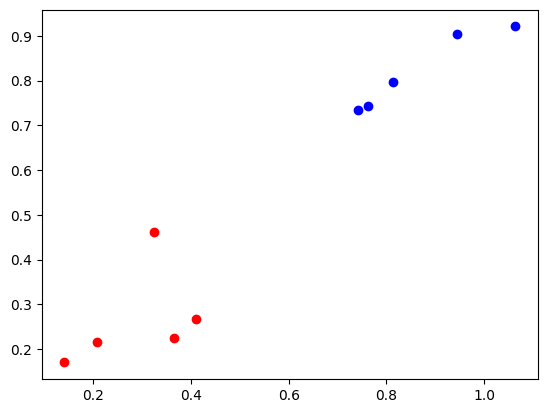

In [112]:
input=[]
output=[]
for x in range(size+1):
  egz=np.random.random(size+1)
  egz[-1]=1
  input.append(np.copy(egz))
for x in input:
  output.append(aff_matrix @ x)

print(input[0])
print(output[0])

for x in input:
  plt.scatter(x[0],x[1],c='r')
for x in output:
  plt.scatter(x[0],x[1],c='b')

[[0.24413876 0.79937208 0.54458739 0.28665082 0.39926609]
 [0.25297135 0.3909951  0.6061894  0.14826487 0.49409873]
 [0.82010425 0.95774976 0.23742285 0.85000618 0.44982273]
 [0.0617569  0.06990993 0.32790407 0.95415055 0.23256891]
 [0.         0.         0.         0.         1.        ]] [[-2.70283045  2.30642626  1.37029028 -0.7671207  -0.49843301]
 [ 2.28606069 -1.84519767 -0.08708413 -0.32248698  0.11313616]
 [-0.38038401  2.05334435 -0.54101429  0.27717224 -0.68378151]
 [ 0.1381643  -0.71973973  0.10361463  1.02607931  0.0152158 ]
 [ 0.          0.          0.          0.          1.        ]]


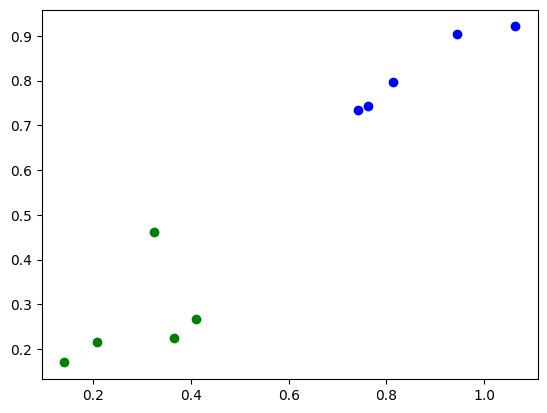

In [113]:

ffa_matrix=np.linalg.inv(aff_matrix)
print(aff_matrix,ffa_matrix)
rev=[]
for x in output:
  rev.append(ffa_matrix @ x)

for x in rev:
  plt.scatter(x[0],x[1],c='g')
for x in output:
  plt.scatter(x[0],x[1],c='b')

In [114]:
# import numpy as np
# mat=np.zeros([40200, 40200])
# for x in range(40200):
#   mat[x,x]=1
# print(mat)
# print(np.linalg.det(mat))

In [115]:
output_agr=[]
for x in output:
  output_agr.append(x[0:-1])
output_agr=np.array(output_agr).reshape(size*(size+1))
print(output_agr.shape)

(20,)


In [116]:
import scipy.linalg




M=np.zeros([(size+1)*size,(size+1)*size])
for v_num, v in enumerate(input):
  for x in range(size):
    for y in range(size+1):
      M[v_num*size+x,x*(size+1)+y]=v[y]

print(M.shape)



# for x in range(1,size):
#   M[size*x,:]=0
# print(M)

# # W=scipy.linalg.inv(M)
# W=np.linalg.inv(M)

from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
import numpy as np



# Creating a vector b for Ax = b
b = output_agr

# Solve Ax = b without directly inverting A
W = spsolve(M, b)

# x contains the solution to the system



# W=matrix_reverse(M)

print(M)
print(W)
print(aff_matrix)
#elements=W@output_agr
# print(elements)

(20, 20)
[[0.20759954 0.21641402 0.32804116 0.49712134 1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.20759954
  0.21641402 0.32804116 0.49712134 1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.20759954 0.21641402
  0.32804116 0.49712134 1.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.20759954 0.21641402 0.32804116
  0.49712134 1.        ]
 [0.32497915 0.46129522 0.1622561  0.44545832 1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0. 

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [117]:
aff_matrix2=np.zeros([size+1,size+1])
for x in range(size):
  aff_matrix2[0:size+1][x]=W[x*(size+1):x*(size+1)+size+1]

aff_matrix2[-1,-1]=1
print(aff_matrix2)
print(aff_matrix)


[[0.24413876 0.79937208 0.54458739 0.28665082 0.39926609]
 [0.25297135 0.3909951  0.6061894  0.14826487 0.49409873]
 [0.82010425 0.95774976 0.23742285 0.85000618 0.44982273]
 [0.0617569  0.06990993 0.32790407 0.95415055 0.23256891]
 [0.         0.         0.         0.         1.        ]]
[[0.24413876 0.79937208 0.54458739 0.28665082 0.39926609]
 [0.25297135 0.3909951  0.6061894  0.14826487 0.49409873]
 [0.82010425 0.95774976 0.23742285 0.85000618 0.44982273]
 [0.0617569  0.06990993 0.32790407 0.95415055 0.23256891]
 [0.         0.         0.         0.         1.        ]]


385
385
(147840,)
(147840, 147840)
[[ 0.87516314 -0.29968685 -2.00578976 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ... -1.98039019  1.04371059
   1.        ]]
[-2.05173511e-16 -2.38086939e+01 -2.30323622e-01 ... -9.10413417e-02
  3.22427068e-26  8.84720209e-01]
[[-2.05173511e-16 -2.38086939e+01 -2.30323622e-01 ...  4.09933660e-01
  -5.71066976e-26 -1.85628412e+00]
 [ 2.57961137e+10  1.31860749e+26 -2.35230708e+25 ... -6.27891848e+24
   2.98022137e-01 -2.07903349e+25]
 [ 5.89093943e+08 -1.49757548e+24  5.21067443e+23 ...  1.17653488e+23
   4.78277665e-03  1.17177768e+24]
 ...
 [-4.34069221e+08  7.60453712e+24 -1.46278776e+24 ... -4.23293748e+23
   1.61892073e-02 -1

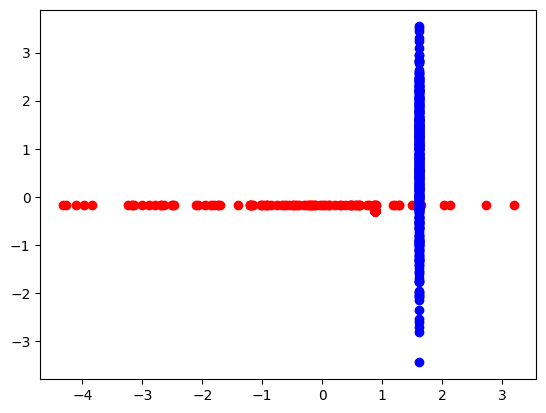

In [118]:
import numpy as np
import matplotlib.pyplot as plt
size=384

home = np.load('home.npy')
defense = np.load('defense1.npy')

output=[]
input=[]

for x in range(100,100+size+1):
  egz=np.zeros(size+1)
  egz[:-1]=home[x]
  egz[-1]=1
  input.append(np.copy(egz))
for x in range(100,100+size+1):
  egz=np.zeros(size+1)
  egz[:-1]=defense[x]
  egz[-1]=1
  output.append(np.copy(egz))

print(len(input))
print(len(output))

for x in input:
  plt.scatter(x[0],x[1],c='r')
for x in output:
  plt.scatter(x[0],x[1],c='b')

output_agr=[]
for x in output:
  output_agr.append(x[0:-1])
output_agr=np.array(output_agr).reshape(size*(size+1))
print(output_agr.shape)

import scipy.linalg




M=np.zeros([(size+1)*size,(size+1)*size])
for v_num, v in enumerate(input):
  for x in range(size):
    for y in range(size+1):
      M[v_num*size+x,x*(size+1)+y]=v[y]

print(M.shape)




from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
import numpy as np

b = output_agr

W = spsolve(M, b)

print(M)
print(W)

aff_matrix2=np.zeros([size+1,size+1])
for x in range(size):
  aff_matrix2[0:size+1][x]=W[x*(size+1):x*(size+1)+size+1]

aff_matrix2[-1,-1]=1
print(aff_matrix2)


print(input[0])


In [119]:
aff_matrix2=np.zeros([size+1,size+1])
for x in range(size):
  aff_matrix2[0:size+1][x]=W[x*(size+1):x*(size+1)+size+1]

aff_matrix2[-1,-1]=1
print(aff_matrix2)
print((output[1]))
print(aff_matrix2@(input[1]))


print(np.isclose((output[1]),aff_matrix2@(input[1])))
print(np.isclose((output[2]),aff_matrix2@(input[2])))
glupie_duze=np.copy(aff_matrix2)
glupie_duze[glupie_duze>0.1]=0
glupie_duze[glupie_duze<-0.1]=0
print(glupie_duze)
print(((output[1] - glupie_duze@input[1]) ** 2).mean(axis=0))

# print(aff_matrix2)

[[-2.05173511e-16 -2.38086939e+01 -2.30323622e-01 ...  4.09933660e-01
  -5.71066976e-26 -1.85628412e+00]
 [ 2.57961137e+10  1.31860749e+26 -2.35230708e+25 ... -6.27891848e+24
   2.98022137e-01 -2.07903349e+25]
 [ 5.89093943e+08 -1.49757548e+24  5.21067443e+23 ...  1.17653488e+23
   4.78277665e-03  1.17177768e+24]
 ...
 [-4.34069221e+08  7.60453712e+24 -1.46278776e+24 ... -4.23293748e+23
   1.61892073e-02 -1.55467524e+24]
 [ 6.89254763e-16 -4.67920811e-01 -3.93546428e-01 ... -9.10413417e-02
   3.22427068e-26  8.84720209e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]
[ 1.62470853e+00 -2.72187442e-01  1.79440570e+00  2.08496475e+00
  7.01437533e-01  1.23830819e+00  8.01011086e-01  6.02362573e-01
  1.47687864e+00  2.29754233e+00 -6.12594076e-02 -7.41325855e-01
 -8.58561695e-01  5.60018560e-03  2.48209190e+00  3.46199274e-01
  1.19452260e-01  1.65782809e+00  1.09445274e+00 -9.66514945e-01
  1.75115675e-01  3.76346946e-01 -1.483

In [120]:
print(((output[1] - output[3]) ** 2).mean(axis=0))

1.9980122703951155


In [121]:
print((W).shape)

(147840,)


In [101]:
print(((M@W - output_agr) ** 2).mean(axis=0))

1.4111722724999407e+20


In [102]:
print(M@W)

[ 1.62470853e+00 -8.58993459e+09  1.87904819e+09 ... -6.03557885e-01
  5.36870912e+08  5.18824399e-01]


In [103]:
print( output_agr)

[ 1.62470853  1.43444777  0.72803116 ... -0.60355788 -0.91113174
  0.5188244 ]


In [109]:
print(M[0][M[0]!=0].shape)
print(M[1][M[1]!=0].shape)

(385,)
(385,)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve, cg, gmres

size=384

home = np.load('home.npy')#shape n x 384
defense = np.load('defense1.npy')#shape n x 384

input=[]
output=[]

for x in range(size+1):
  egz=np.zeros(size+1)
  egz[:-1]=home[x]
  egz[-1]=1
  input.append(np.copy(egz))

for x in range(size+1):
  egz=np.zeros(size+1)
  egz[:-1]=defense[x]
  egz[-1]=1
  output.append(np.copy(egz))


output_agr=[]
for x in output:
  output_agr.append(x[0:-1])
output_agr=np.array(output_agr).reshape(size*(size+1))
print(output_agr.shape)


M=np.zeros([(size+1)*size,(size+1)*size])
for v_num, v in enumerate(input):
  for x in range(size):
    for y in range(size+1):
      M[v_num*size+x,x*(size+1)+y]=v[y]


b = np.copy(output_agr)

A = csc_matrix(M)

W = cg(A, b)

print(M)
print(W)

aff_matrix2=np.zeros([size+1,size+1])
for x in range(size):
  aff_matrix2[0:size+1][x]=W[x*(size+1):x*(size+1)+size+1]

aff_matrix2[-1,-1]=1
print(aff_matrix2)


print(input[0])

aff_matrix2=np.zeros([size+1,size+1])
for x in range(size):
  aff_matrix2[0:size+1][x]=W[x*(size+1):x*(size+1)+size+1]

aff_matrix2[-1,-1]=1
print(aff_matrix2)
print((output[1]))
print(aff_matrix2@(input[1]))


print(np.isclose((output[1]),aff_matrix2@(input[1])))
print(np.isclose((output[2]),aff_matrix2@(input[2])))
glupie_duze=np.copy(aff_matrix2)
glupie_duze[glupie_duze>0.1]=0
glupie_duze[glupie_duze<-0.1]=0
print(glupie_duze)
print(((output[1] - glupie_duze@input[1]) ** 2).mean(axis=0))

(147840,)


KeyboardInterrupt: 

In [2]:
print(A@W)
print(b)

[ 1.62470853e+00 -1.54618823e+11  2.68435456e+09 ... -6.03557885e-01
  2.37565379e+10  5.18824399e-01]
[ 1.62470853  0.92259109  0.76268482 ... -0.60355788 -0.95891446
  0.5188244 ]
